# PA 2: Classification - Decision Tree

## Student Details ( 1 Point)
Student Name and ID:   <----- Only this student will submit the assignment


Student Name and ID: 


Notes: When submitting, fill your name and ID in this cell.  [1 point]


Do not to forget to cite any external sources used by you.

## Programming Assignment Submission Instructions (2 Points)


Step 1: Rename this submission file as 'yourLastName_Last4digitsofyourID_DT.ipynb' [1 point]

Step 2: Place this file inside the folder 'PA#2_Classification_yourLastName'  [1 point]

Do not upload the database file [-50 points]


## Programming Assignment Details (7 Points)


For this assignment use Jupyter notebook, Pandas, and scikit.

1) Load Heart dataset from cardio_train.csv  [1 points]


2) Create a dataframe and print the first and last five records of your dataset.  [2 points]


3) Print the class labels.  [2 points]


4) Split your dataset 70% for training, and 30% for testing the classifier.  [2 points]


# DecisionTree (10 Points)
1) Use gini and entropy to measure the quality of a split.  [2 points]


2) Use comments to explain your code and variable names. [1 point]


3) Calculate and print the confusion matrix, and the classification Report (includes: precision, recall, f1-score, and support).  [2 points]


4) Print the decision tree visualization.  [5 points]


# Naive Bayes (10 Points)


1) Use Naive bayes classifier (Gaussian) to predict the test data[5 point] 


2) Use comments to explain your code and variable names[1 point]


3) Calculate and print the confusion matrix, and the classification Report (includes: precision, recall, f1-score, and support).  [4 points]


## Report (20 Points)


1) Describe the Decision Tree methods, and Naive Bayes classifier. Dont copy paste it from the internet. Write it on your own.  [4 points]


2) Describe the datasets [3 points] and if you have done any pre-processing , and your code. [2 points]


4) Visualization of the decision tree for gini and entropy.[5 points]


5) Interpret your results, and do not forget to compare gini and entropy [6 points]

Do not to forget to cite your sources!


## Please consult the TA before using any other packages apart from sklearn,numpy,pandas, matplotlib and seaborn.

# - - - - - - - - - - - - - - - Solution - - - - - - - - - - - - - - - - - - 

In [1]:
# Import statements
#Array processing
import numpy as np
#Data analysis, wrangling and common exploratory operations
import pandas as pd
from pandas import Series, DataFrame
import sklearn.metrics as metrics
from sklearn.metrics import classification_report 

In [2]:
# get the csv 
# !rm -rf cardio_train.csv
# !wget "https://raw.githubusercontent.com/kchaitanya863/CSE-5334-Data-Mining/master/%23PA2%20(DTNB%26KNN)/cardio_train.csv"

In [3]:
#read the csv file into a Pandas data frame
df = pd.read_csv('cardio_train.csv', sep=';')

#return the first 5 rows of the dataset
# df.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


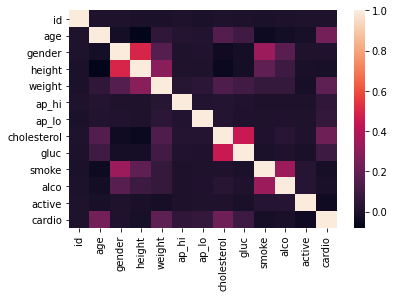

In [4]:
# https://stackoverflow.com/questions/39409866/correlation-heatmap
import seaborn as sns

Var_Corr = df.corr()
# plot the heatmap and annotation on it
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns)

In [5]:
from sklearn import tree
from sklearn.model_selection import train_test_split

X = df.drop(['cardio', 'id'], axis=1)
y = df['cardio']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
model = tree.DecisionTreeClassifier( random_state=2,max_depth=3,min_samples_leaf=5)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("The Accuracy is:", accuracy_score(y_test,y_predict)*100,"\n")
print("Classification Report: \n",classification_report(y_test,y_predict))

The Accuracy is: 72.75238095238096 

Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.78      0.74     10352
           1       0.76      0.68      0.72     10648

    accuracy                           0.73     21000
   macro avg       0.73      0.73      0.73     21000
weighted avg       0.73      0.73      0.73     21000



In [6]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Predicted Not Cardio', 'Predicted Cardio'],
    index=['True Not Cardio', 'True Cardio']
)

,Predicted Not Cardio,Predicted Cardio
True Not Cardio,8059,2293
True Cardio,3429,7219


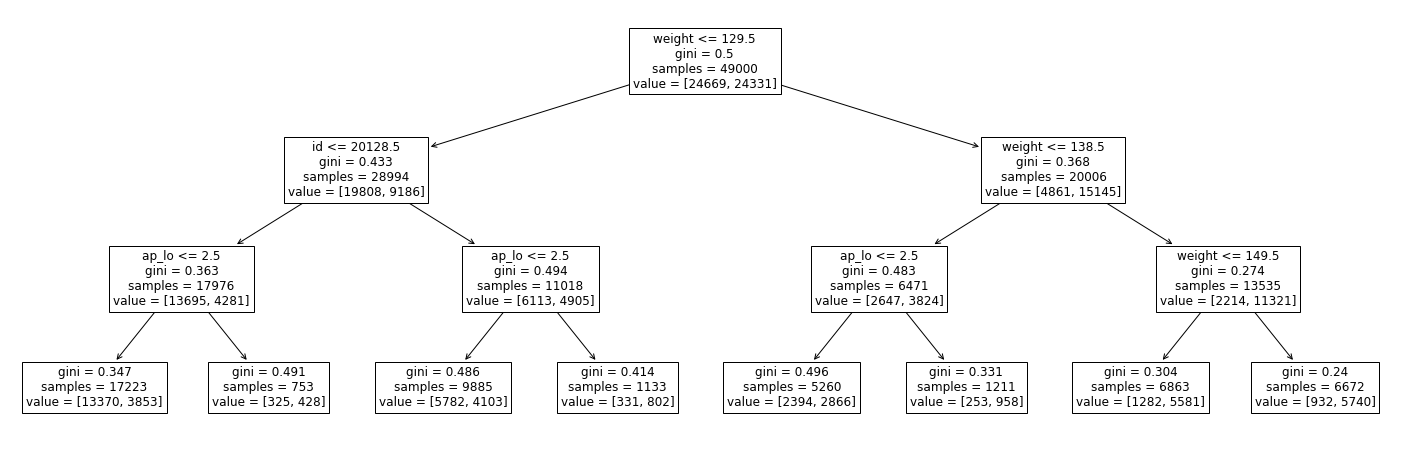

In [7]:
from sklearn import tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(25, 8))
tree.plot_tree(model, fontsize=12, feature_names = df.columns)
plt.show()

In [8]:
# using entropy

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
model = tree.DecisionTreeClassifier( criterion= 'entropy' , random_state=100,max_depth=3,min_samples_leaf=5)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("The Accuracy is:", accuracy_score(y_test,y_predict)*100,"\n")
print("Classification Report: \n",classification_report(y_test,y_predict))

The Accuracy is: 72.75238095238096 

Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.78      0.74     10352
           1       0.76      0.68      0.72     10648

    accuracy                           0.73     21000
   macro avg       0.73      0.73      0.73     21000
weighted avg       0.73      0.73      0.73     21000



In [9]:
pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Predicted Not Cardio', 'Predicted Cardio'],
    index=['True Not Cardio', 'True Cardio']
)

,Predicted Not Cardio,Predicted Cardio
True Not Cardio,8059,2293
True Cardio,3429,7219


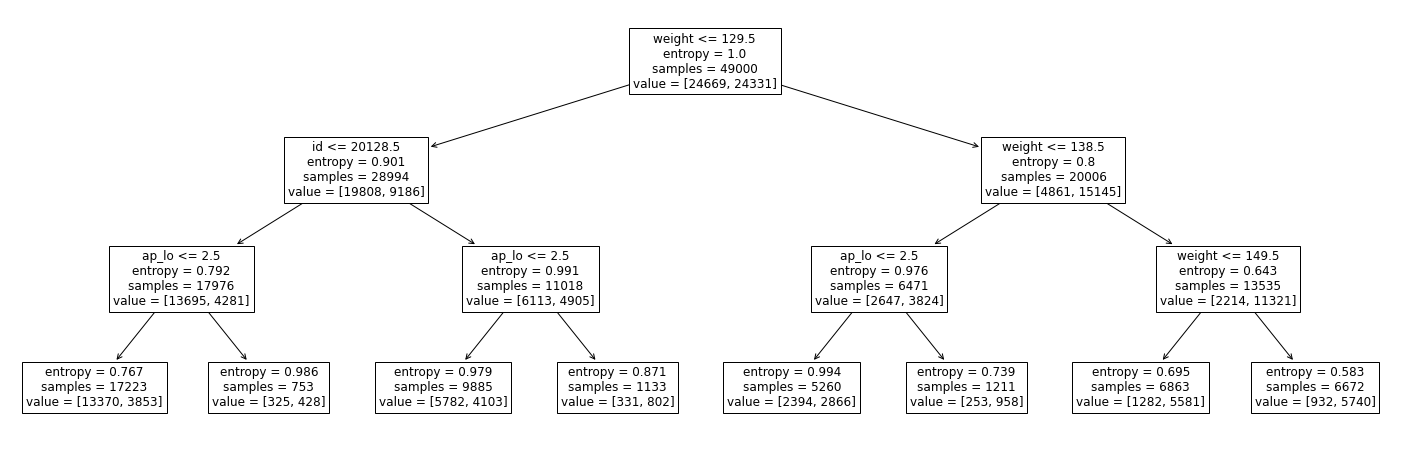

In [10]:
# plot entropy
fig, ax = plt.subplots(figsize=(25, 8))
tree.plot_tree(model, fontsize=12, feature_names = df.columns)
plt.show()

In [11]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB(var_smoothing= 12)
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"  % (X_test.shape[0], (y_test != y_pred).sum()))
print("The Accuracy is:", accuracy_score(y_test,y_pred)*100,"\n")
print("Classification Report: \n",classification_report(y_test,y_pred))

Number of mislabeled points out of a total 21000 points : 8464
The Accuracy is: 59.69523809523809 

Classification Report: 
               precision    recall  f1-score   support

           0       0.58      0.65      0.62     10352
           1       0.62      0.54      0.58     10648

    accuracy                           0.60     21000
   macro avg       0.60      0.60      0.60     21000
weighted avg       0.60      0.60      0.60     21000



In [12]:
pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted Not Cardio', 'Predicted Cardio'],
    index=['True Not Cardio', 'True Cardio']
)

,Predicted Not Cardio,Predicted Cardio
True Not Cardio,6766,3586
True Cardio,4878,5770


## Using weka to classify and build decision tree

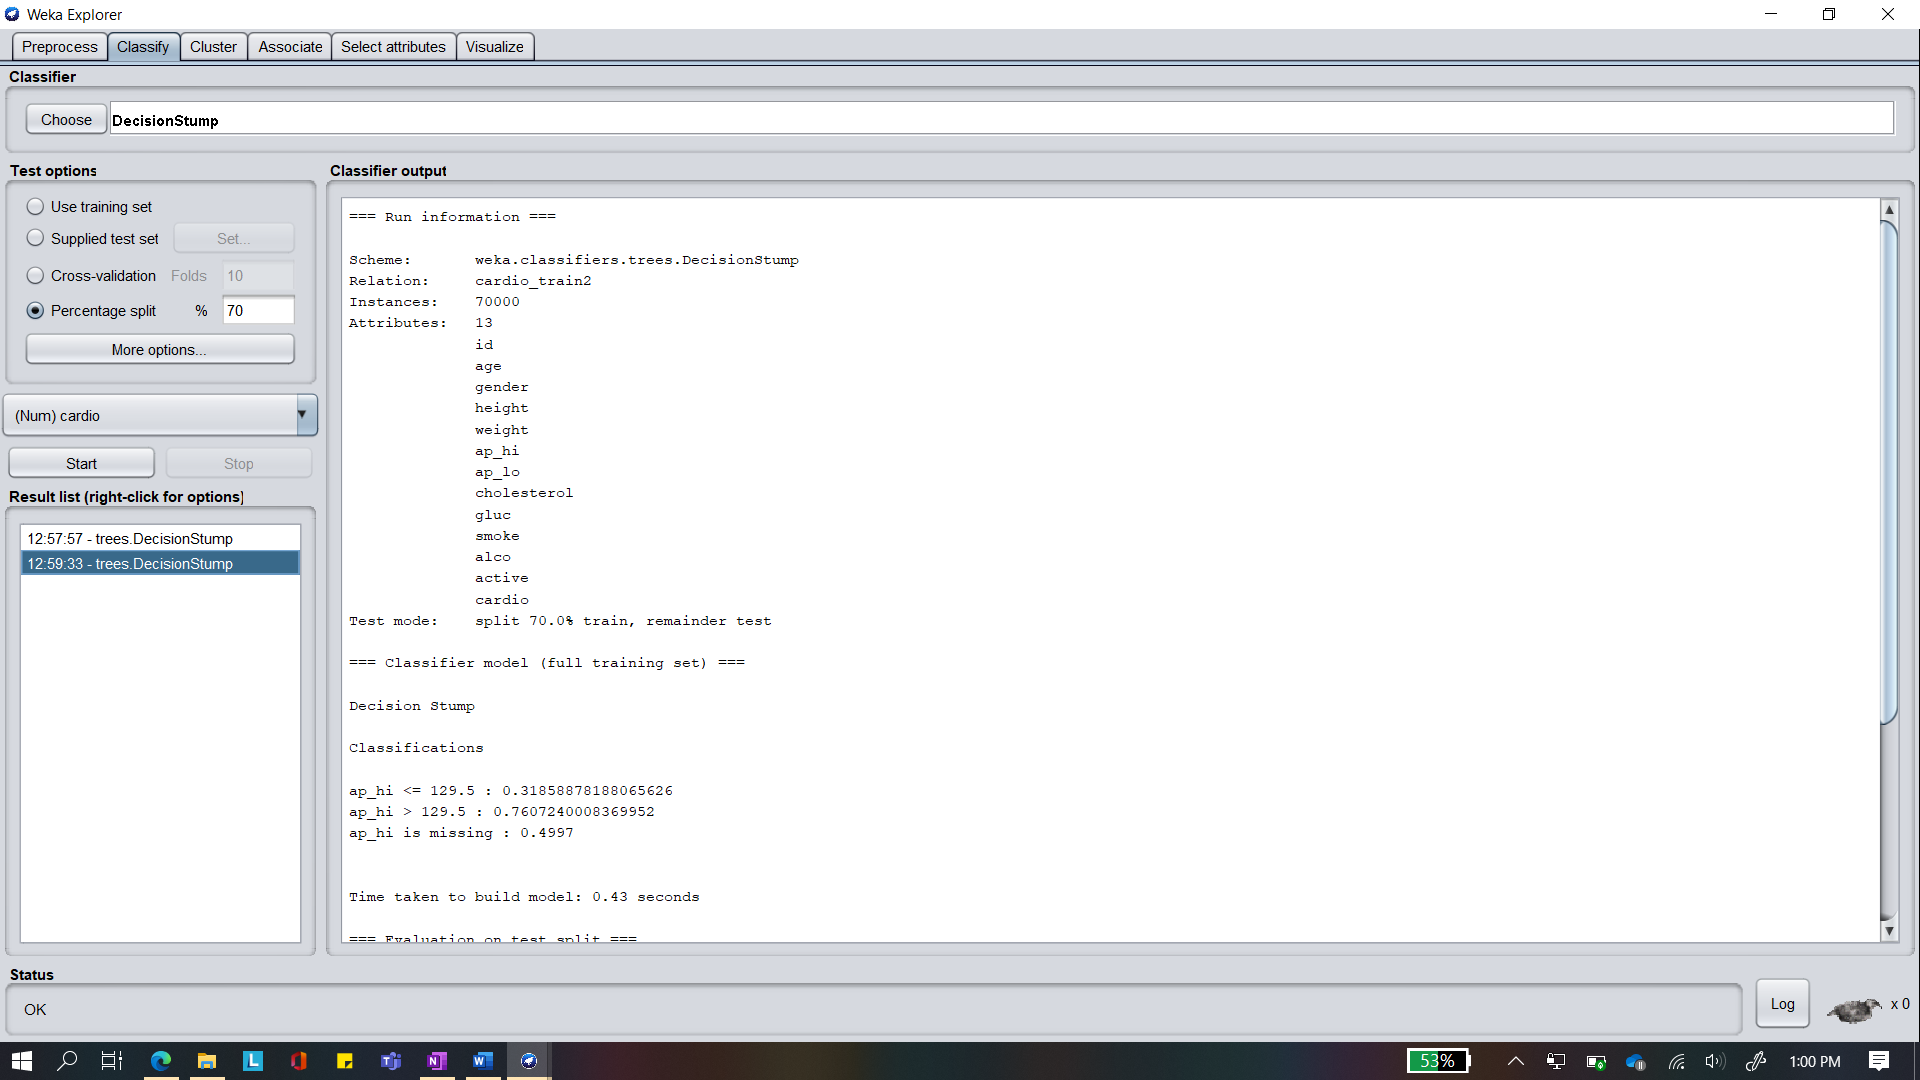

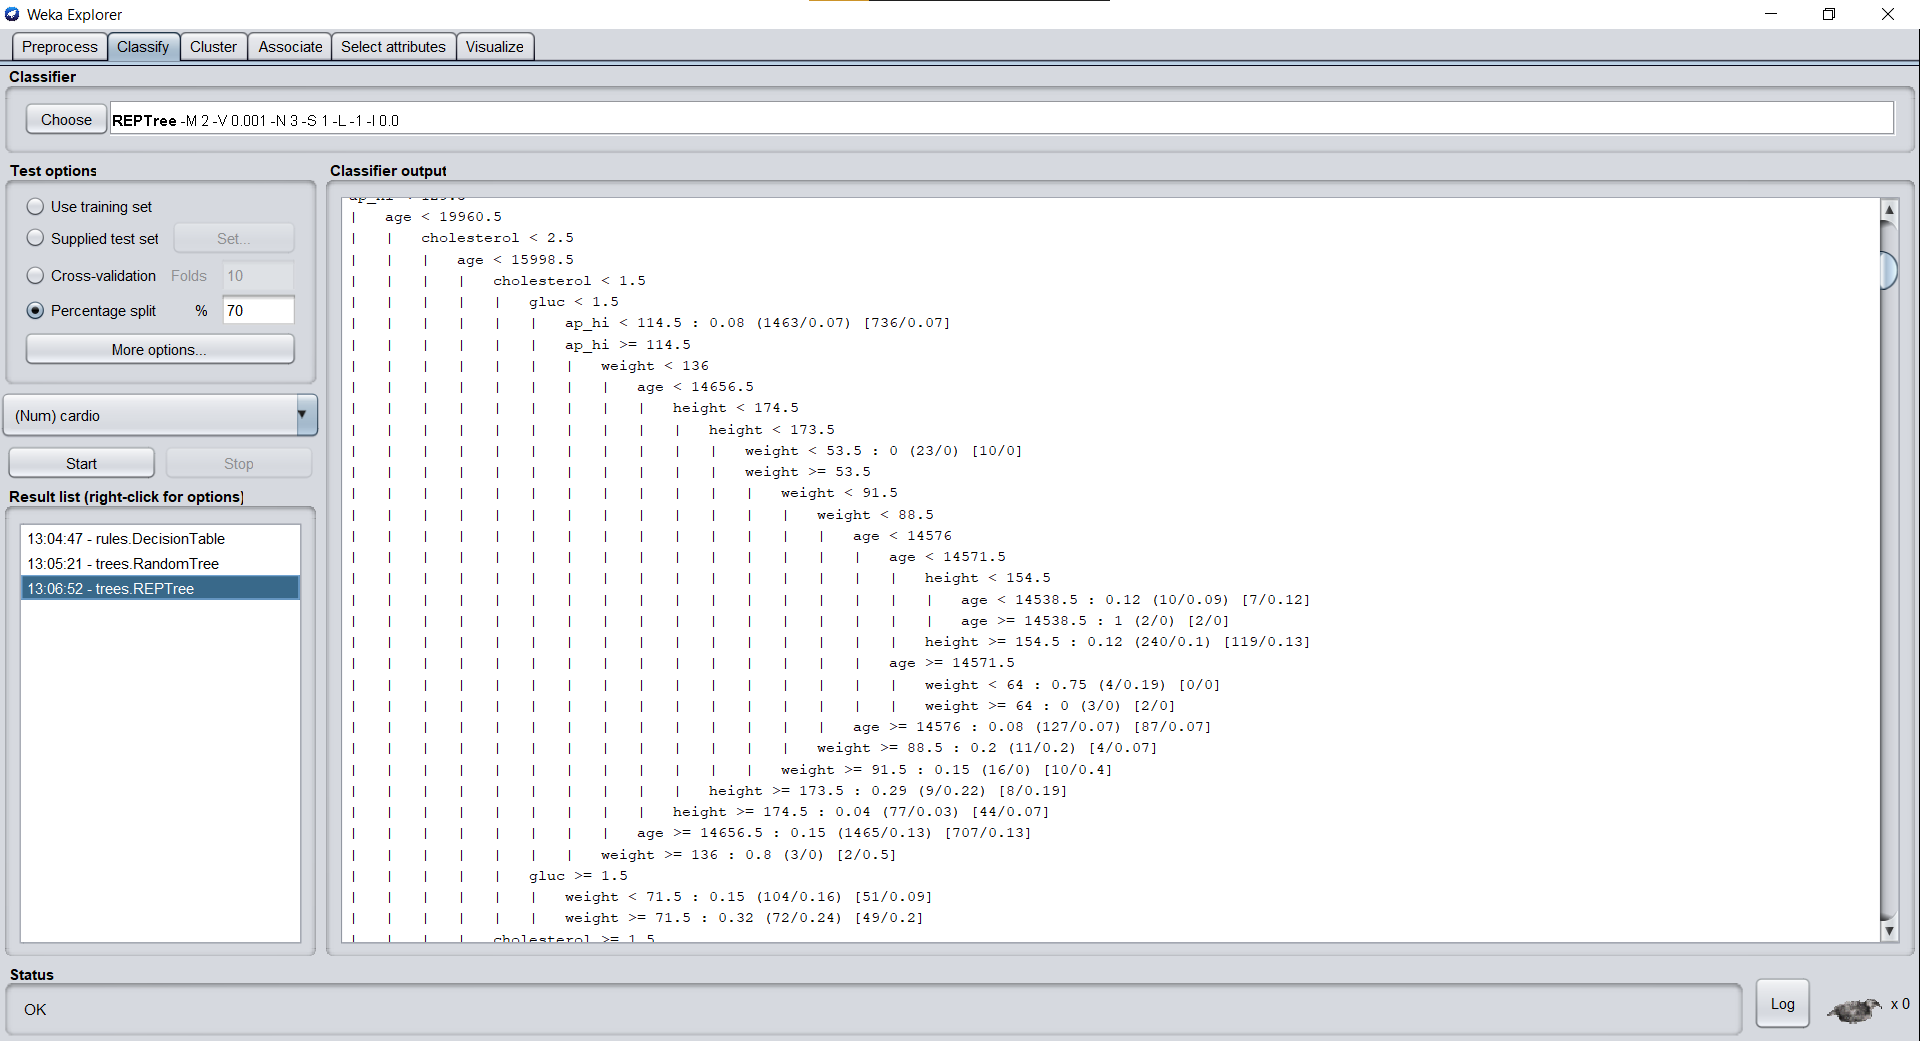

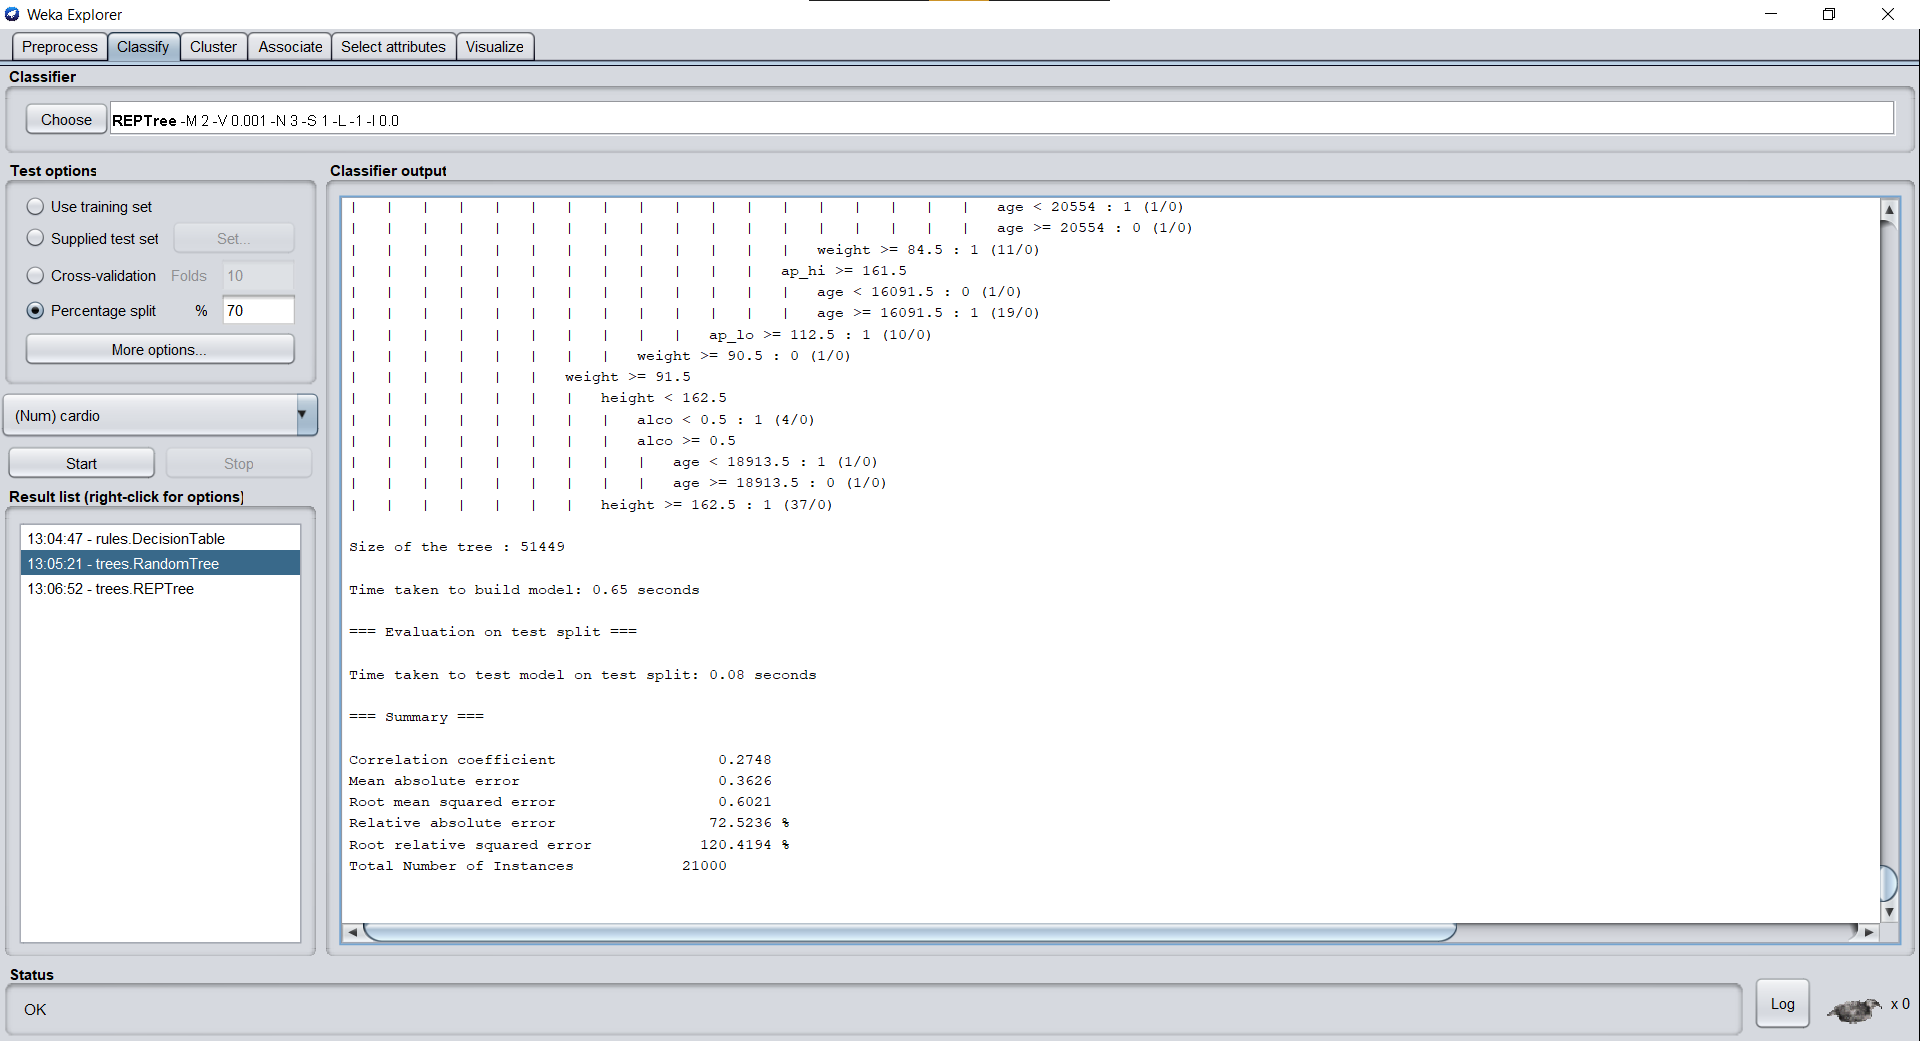

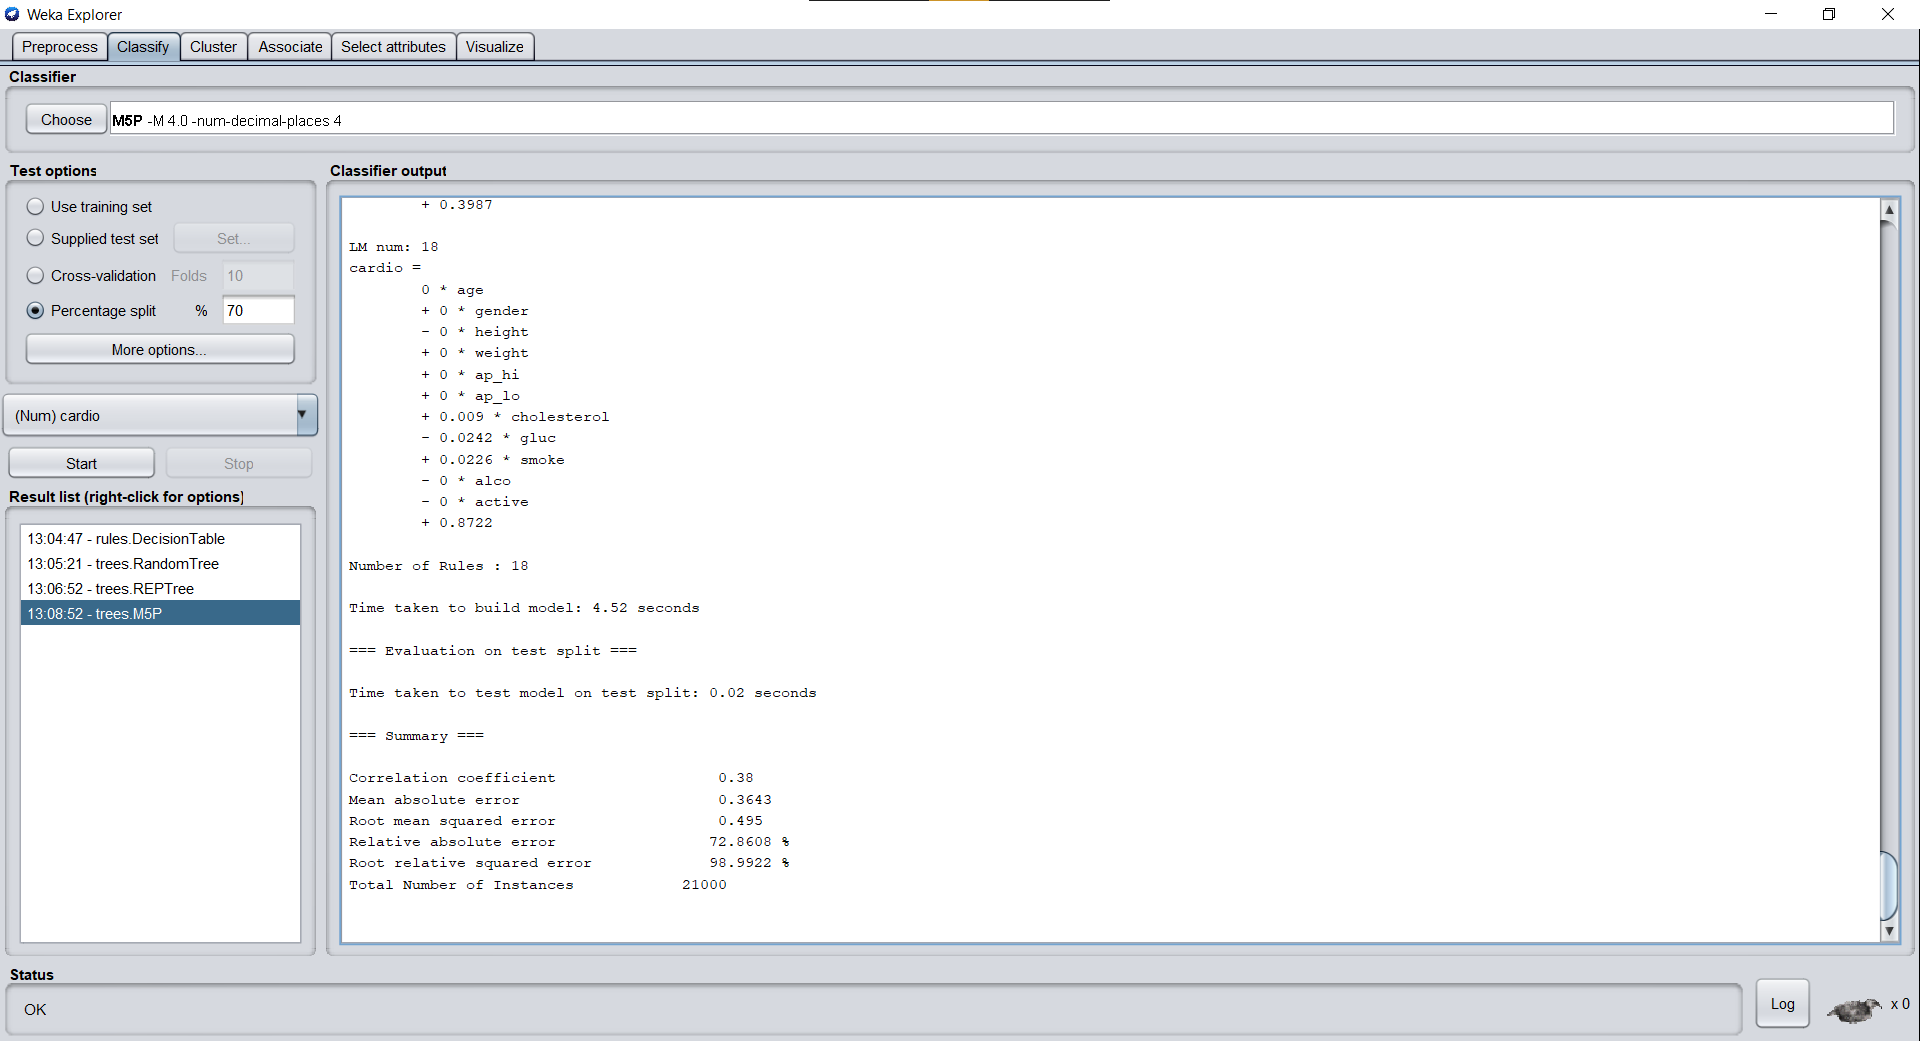

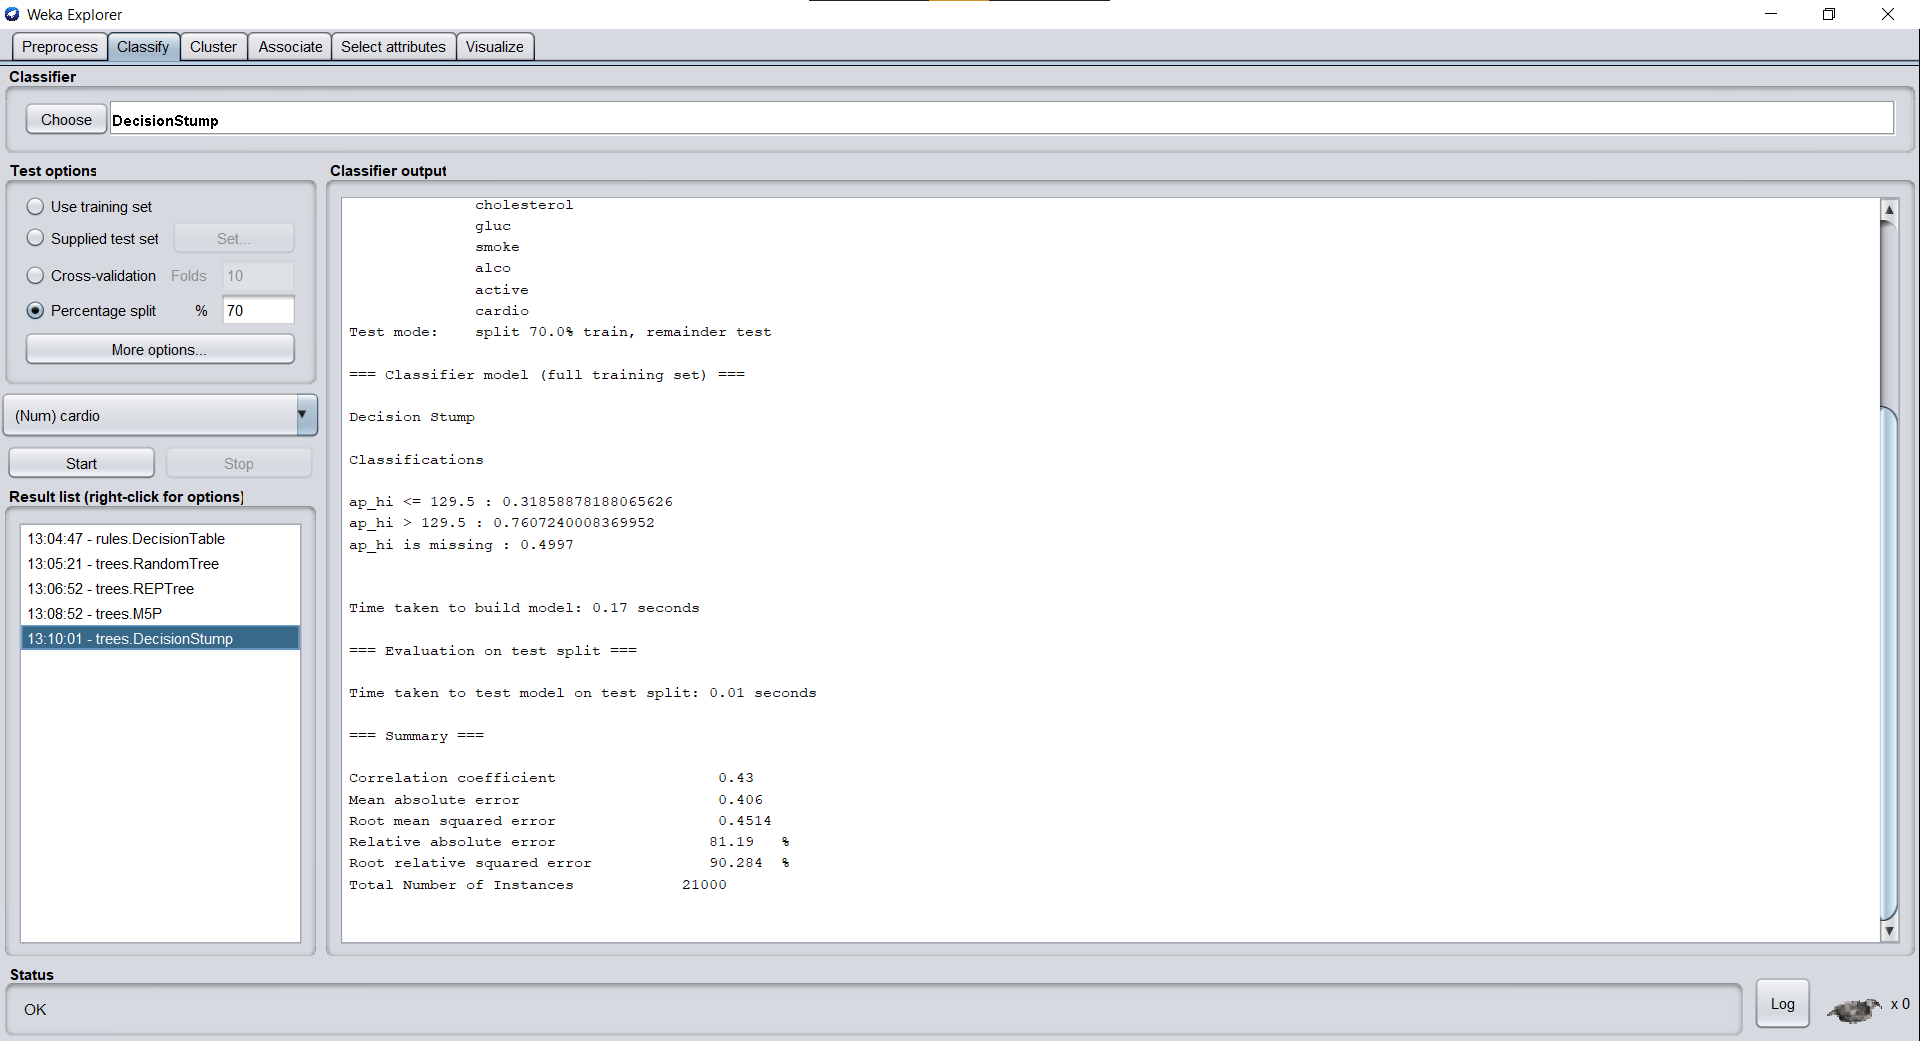